# XRAY Covid Classification Assignment

## Background:
The objective of this assignment is to develop a binary
image classification model for identifying and categorizing COVID-19
images to determine whether a patient has COVID-19 or not.

## Data Description:
The dataset used in this task consists of chest X-Ray images in JPEG format, which are classified into two categories, COVID-19 and Healthy.

## Report:
This notebook was created and ran in google colab with python 3 and T4 GPU setting.

Since this is a deep learning model GPU has an advantage over CPU, that why we are running the project on GPU. We are using fastai as our deep learning library and resnet34 as our model. Resnet34 is a state-of-the-art image classification model, structured as a 34 layer convolutional neural network. Restnet34 is pre-trained on the ImageNet dataset which contains 100,000+ images across 200 different classes.
However, RestNet is different from traditional neural networks in the sense that it takes residuals from each layer and uses them in the subsequent connected layers (similar to residual neural networks used for text prediction).

#### Preprocessing:
We load the images and resize them (224x224) to reduce size and run the model faster. We use 20% of the images on the validation set for the model.

#### Model:
Creating the model and training it in our data is the next step and evaluate it using accuracy, f1-score and a confusion matrix. After that we are doing a hyperparameter optimization to find the best learning rate for our model and then use the it for the creation of our final model to get our final results.

## Conclusion:
Our final model has 0.98 accuracy and 0.97 f1-score, which is a very good and acceptable result. Through the confusion matrix we can also see that our model has a balanced ability predict healthy and covid xrays.

# Import Libraries

In [ ]:
# cell output clear tool
from IPython.display import clear_output

# install fastai
!pip install fastai

# clear the output to save space in notebook after installation of fastai
clear_output()

In [ ]:
# import fastai
from fastai.data.all import *
from fastai.vision.all import *

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# data
import pandas as pd
import numpy as np

# visualisations
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# mount google drive
import os
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Set the path to our data

In [ ]:
# Set path to root directory
path = Path('/content/drive/MyDrive/Colab Notebooks/PublicFolder')

# View all files in directory
path.ls()

(#3) [Path('/content/drive/MyDrive/Colab Notebooks/PublicFolder/COVID'),Path('/content/drive/MyDrive/Colab Notebooks/PublicFolder/HEALTHY'),Path('/content/drive/MyDrive/Colab Notebooks/PublicFolder/models')]

# Create ImageDataLoaders Object

This object pulls together all our train data, test data, and validation data and performs the necessary transformations to the images

In [ ]:
# We are creating a fastai DataLoaders from our dataset
# Preprocessing takes place when creating the dataloaders
# May need to decrease batch size and num_workers depending on GPU
data = ImageDataLoaders.from_folder(path,
                                    valid_pct = 0.2, # percent of the train - valid split
                                    seed = 12, # for reproductability
                                    bs=8, # number of samples we want to pass into the training loop at each iteration
                                    item_tfms = Resize(size = 224),
                                    pin_memory = True, # if you are using a CUDA device or GPU, this should speed up loading by removing a copy during the loading operation
                                    drop_last = True,
                                    num_workers=0)

['COVID', 'HEALTHY'] 2
4179 1044


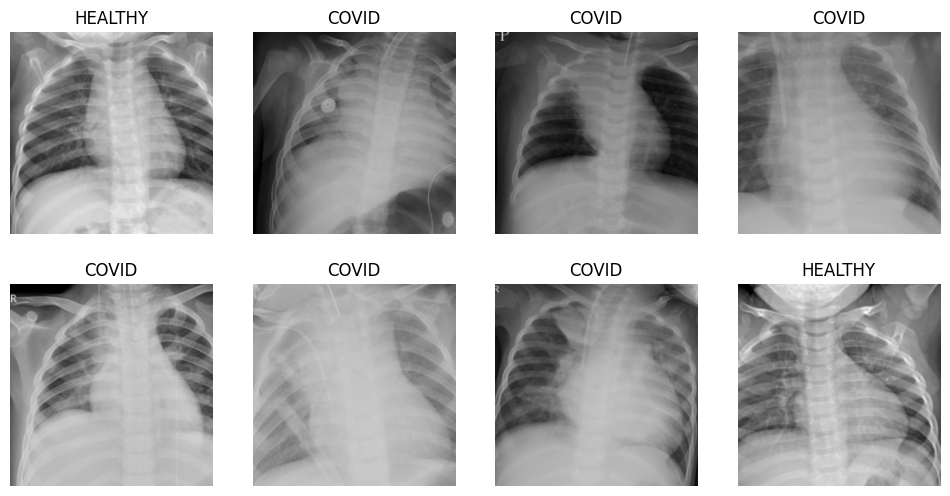

In [ ]:
# Show what the data looks like after being transformed
data.show_batch()

# See the classes and count of classes in your dataset
print(data.vocab,data.c)

# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

# Build our CNN model

In [ ]:
# Build the CNN model with the pretrained resnet34
learn = cnn_learner(data, models.resnet34, metrics = [accuracy, FBeta(beta=1)]) # beta=1 in fbeta is the same as f1-score

# Train the model on 4 epochs of data at the default learning rate
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.392264,0.183829,0.935824,0.888519,03:26
1,0.202855,0.069605,0.975096,0.953901,03:10
2,0.145592,0.058462,0.975096,0.954386,03:10
3,0.093017,0.055607,0.980843,0.965157,03:10


## Save the model

In [ ]:
# Save the model
learn.save('stage-1')

# Load the Model
#learn.load('stage-1')

Path('/content/drive/MyDrive/Colab Notebooks/PublicFolder/models/stage-1.pth')

## Improve our model by finding the best learning rate

SuggestedLRs(valley=6.30957365501672e-05)

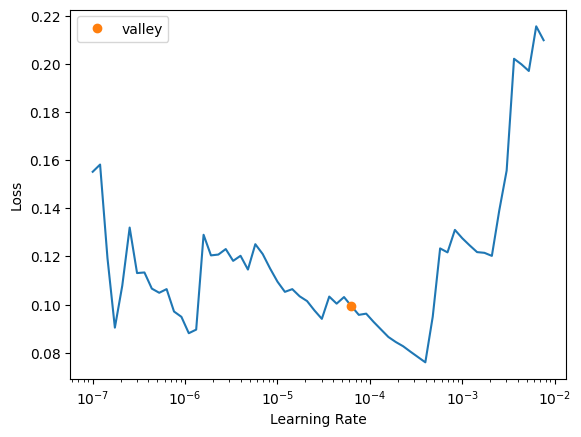

In [ ]:
# Unfreeze all layers of the CNN
learn.unfreeze()

# Find the optimal learning rate and plot a visual
learn.lr_find()

In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(2, lr_max=slice(5.754399353463668e-07, 5.754399353463668e-06))

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.120723,0.051793,0.984674,0.971530,03:18
1,0.136281,0.049008,0.983716,0.970018,03:15


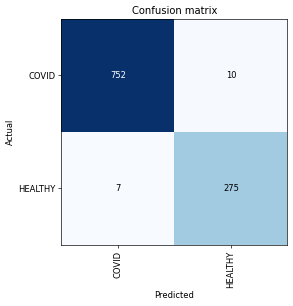

In [ ]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

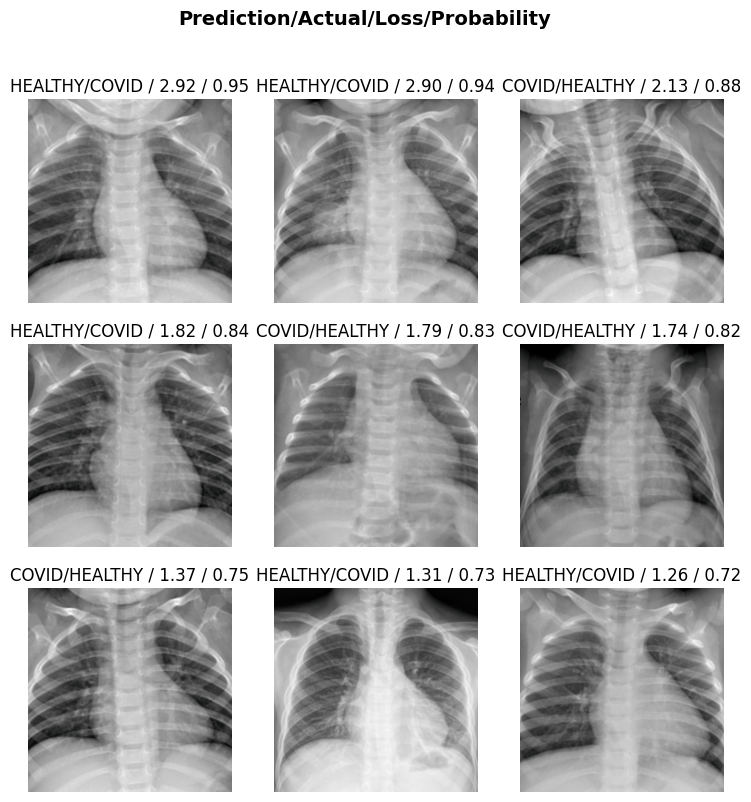

In [ ]:
# plot_top_losses
interp.plot_top_losses(9, figsize=(9,9))